In [136]:
import pandas as pd
import matplotlib.pyplot as plt



In [137]:

data = pd.read_csv(r"C:/Users/rauts/Project_1_Inflation/Sumitra_work/Global Dataset of Inflation.csv", encoding='ISO-8859-1')
# Display the first few rows to inspect the data
data.head()


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,Note,Unnamed: 59
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN


In [138]:

# # Define the range of years as columns
year_columns = [str(year) for year in range(1999, 2023)]


In [139]:

# Filter for 'Food Consumer Price Inflation' and 'Energy Consumer Price Inflation'
filtered_data = data[data['Series Name'].isin(['Food Consumer Price Inflation', 'Energy Consumer Price Inflation'])]
filtered_data = filtered_data[['Country', 'Series Name'] + year_columns]

# Split data by inflation type
food_inflation = filtered_data[filtered_data['Series Name'] == 'Food Consumer Price Inflation'].set_index('Country')
energy_inflation = filtered_data[filtered_data['Series Name'] == 'Energy Consumer Price Inflation'].set_index('Country')


In [140]:
# Find common countries and align data
common_countries = food_inflation.index.intersection(energy_inflation.index)
food_inflation = food_inflation.loc[common_countries, year_columns].fillna(0)
energy_inflation = energy_inflation.loc[common_countries, year_columns].fillna(0)

# Calculate average correlation between Food and Energy Inflation
correlation_food_energy = food_inflation.corrwith(energy_inflation, axis=1)
correlation_food_energy
# Calculate average correlation between Food and Energy Inflation
correlation_food_energy_mean = food_inflation.corrwith(energy_inflation, axis=1).mean()
print(f"Average Correlation Between Food Price Inflation and Energy Price Inflation (1999-2022): {correlation_food_energy_mean:.2f}")


Average Correlation Between Food Price Inflation and Energy Price Inflation (1999-2022): 0.34


In [141]:
# Analyze Food vs. Producer Price Inflation Correlation

# Filter for 'Food Consumer Price Inflation' and 'Producer Price Inflation'
filtered_data = data[data['Series Name'].isin(['Food Consumer Price Inflation', 'Producer Price Inflation'])]
filtered_data = filtered_data[['Country', 'Series Name'] + year_columns]

# Split data by inflation type
food_inflation = filtered_data[filtered_data['Series Name'] == 'Food Consumer Price Inflation'].set_index('Country')
producer_inflation = filtered_data[filtered_data['Series Name'] == 'Producer Price Inflation'].set_index('Country')

In [142]:

# Find common countries and align data
common_countries = food_inflation.index.intersection(producer_inflation.index)
food_inflation = food_inflation.loc[common_countries, year_columns].fillna(0)
producer_inflation = producer_inflation.loc[common_countries, year_columns].fillna(0)

# Calculate average correlation between Food and Producer Inflation
correlation_food_producer = food_inflation.corrwith(producer_inflation, axis=1)
# Calculate average correlation between Food and Producer Inflation
correlation_food_producer_mean = food_inflation.corrwith(producer_inflation, axis=1).mean()
print(f"Average Correlation Between Food Price Inflation and Producer Price Inflation (1999-2022): {correlation_food_producer_mean:.2f}")

Average Correlation Between Food Price Inflation and Producer Price Inflation (1999-2022): 0.47


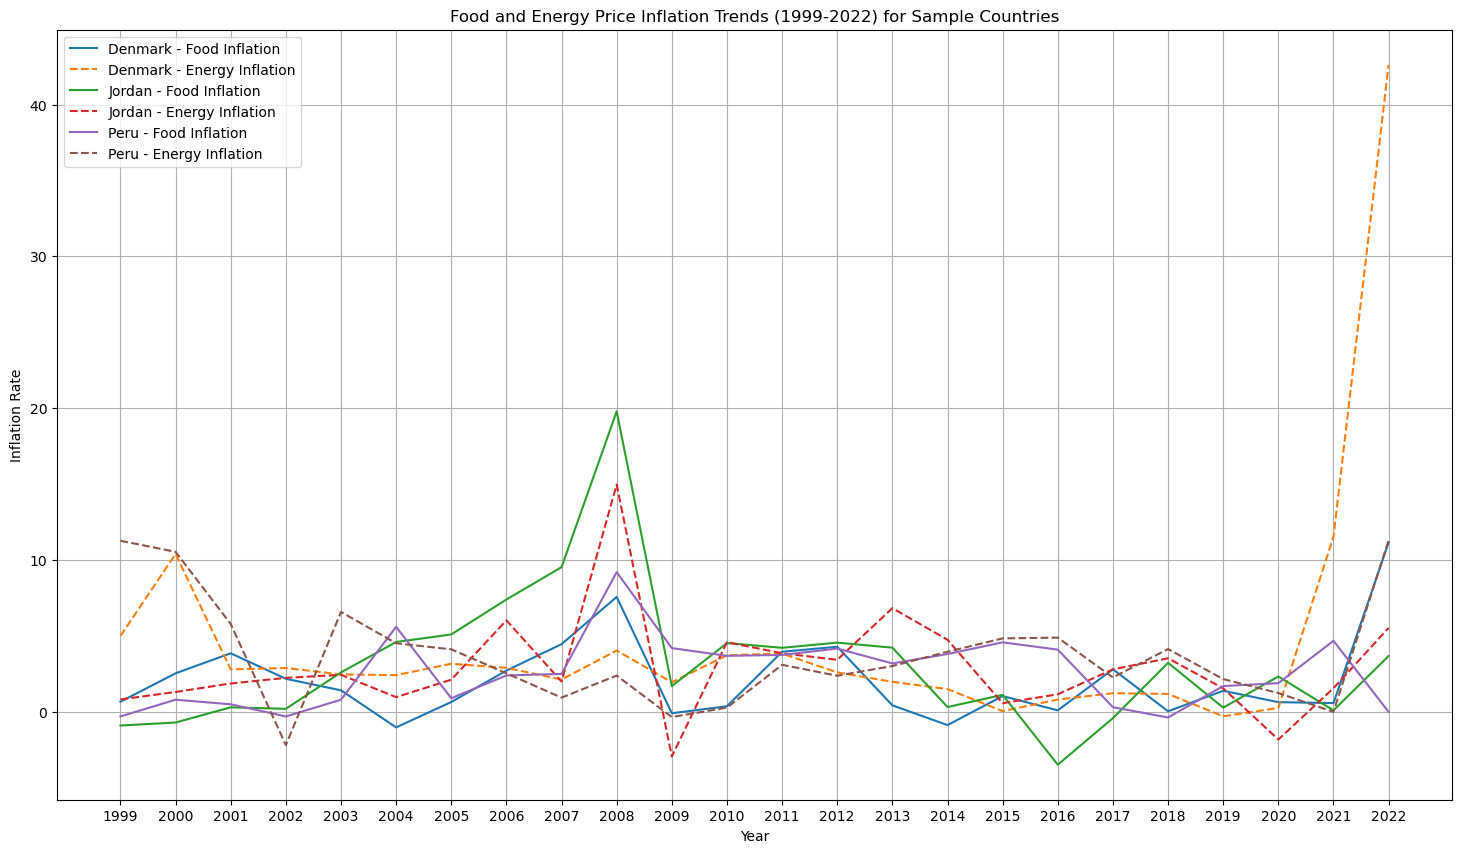

In [143]:
# Plot Inflation Trends for Sample Countries

# Choose a few sample countries (e.g., first 3 in alphabetical order)
sample_countries = common_countries[0:100:25]

# Plot Food vs. Energy Inflation Trends
plt.figure(figsize=(18, 10))
for country in sample_countries:
    if country in food_inflation.index and country in energy_inflation.index:  # Check for missing data
        plt.plot(year_columns, food_inflation.loc[country], label=f"{country} - Food Inflation")
        plt.plot(year_columns, energy_inflation.loc[country], label=f"{country} - Energy Inflation", linestyle='--')
plt.title("Food and Energy Price Inflation Trends (1999-2022) for Sample Countries")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.legend()
plt.grid(True)
plt.show()




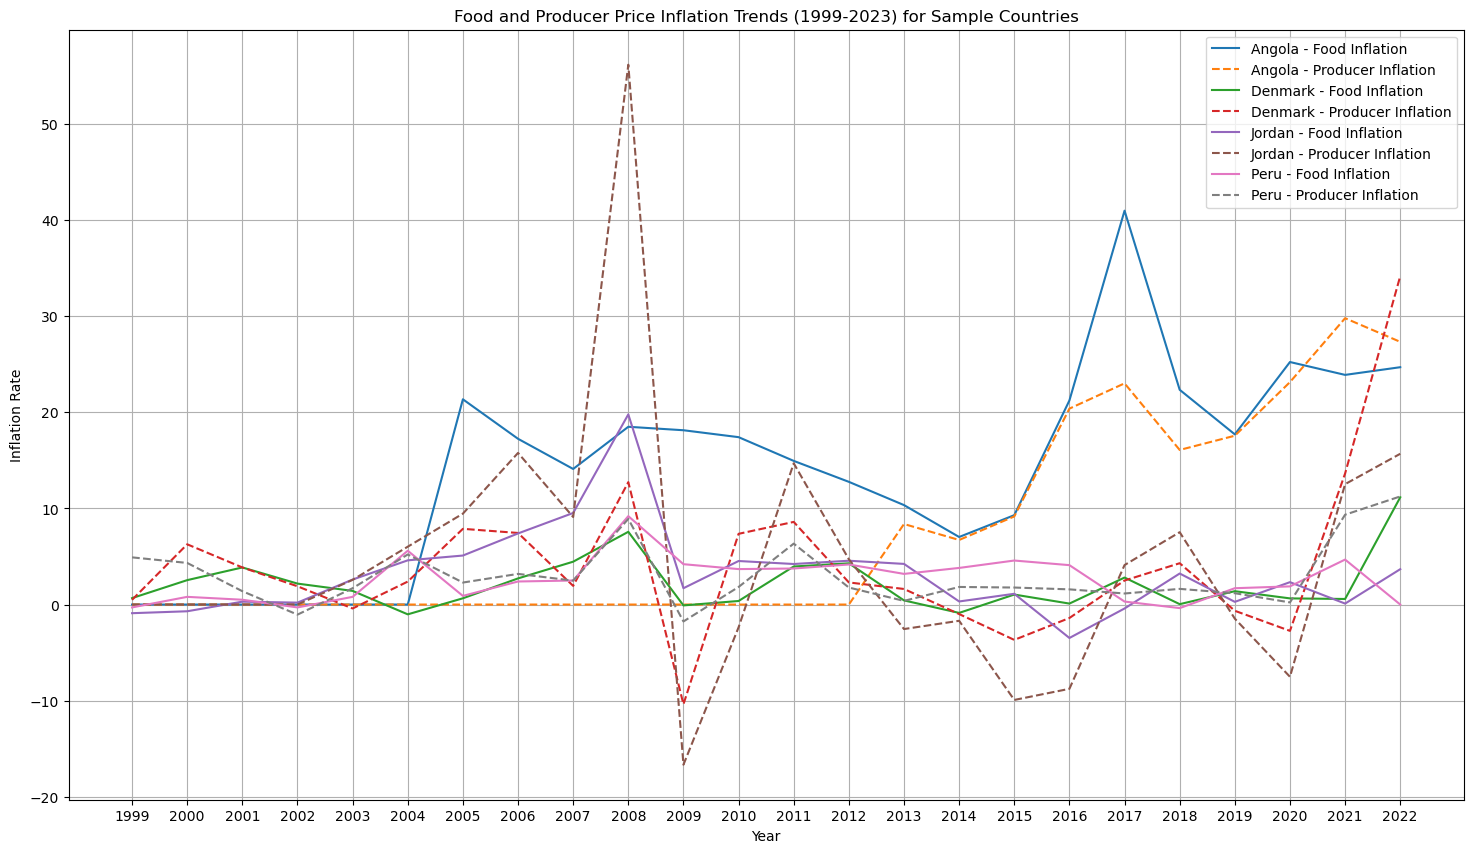

In [144]:

# Plot Food vs. Producer Inflation Trends
plt.figure(figsize=(18, 10))
for country in sample_countries:
    if country in food_inflation.index and country in producer_inflation.index:  # Check for missing data
        plt.plot(year_columns, food_inflation.loc[country], label=f"{country} - Food Inflation")
        plt.plot(year_columns, producer_inflation.loc[country], label=f"{country} - Producer Inflation", linestyle='--')
plt.title("Food and Producer Price Inflation Trends (1999-2023) for Sample Countries")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.legend()
plt.grid(True)
plt.show()


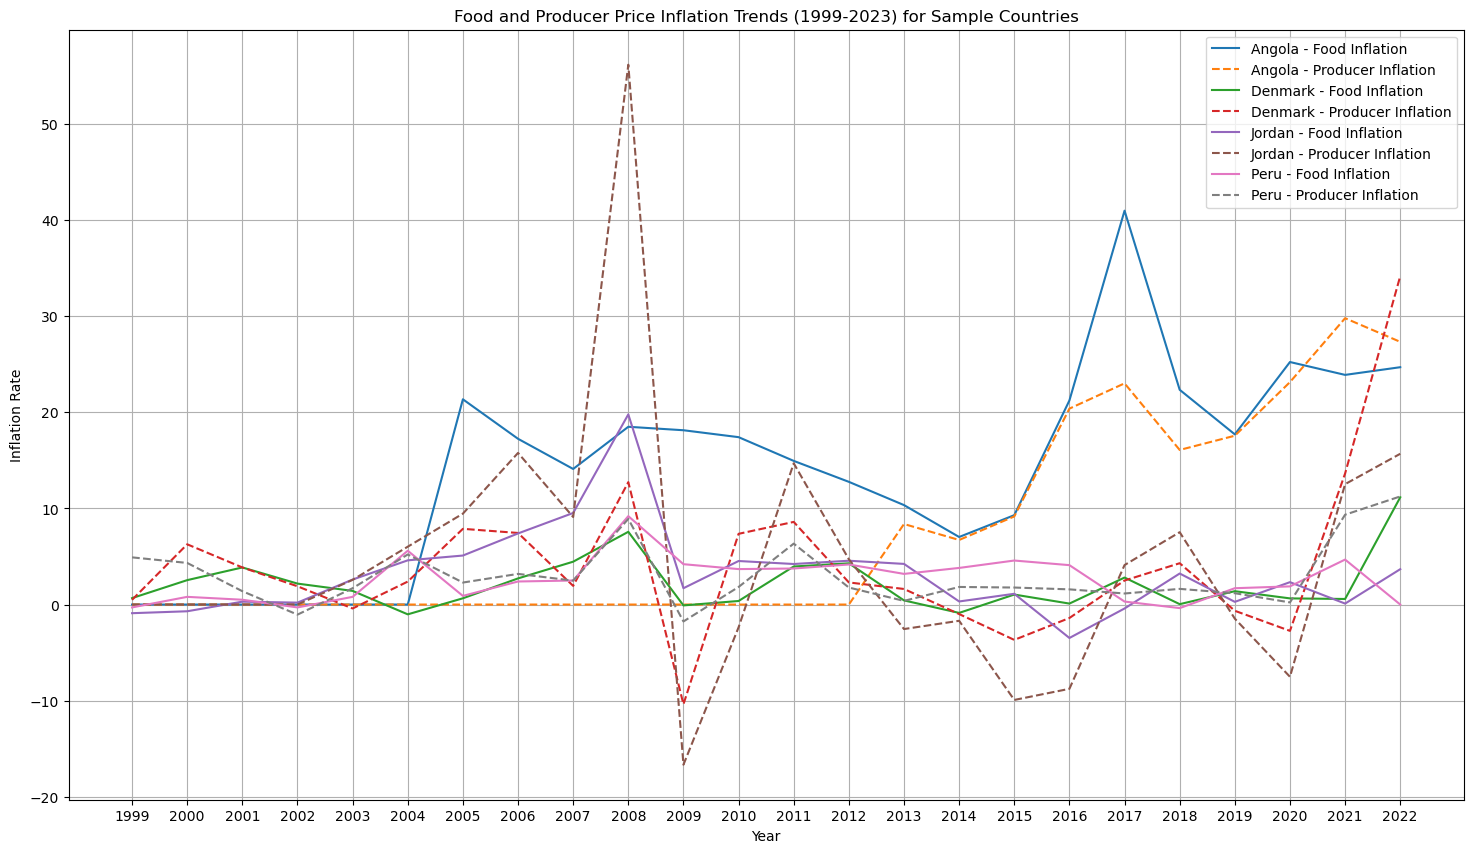

In [145]:
# Plot Food vs. Producer Inflation Trends
plt.figure(figsize=(18, 10))
for country in sample_countries:
    if country in food_inflation.index and country in producer_inflation.index:  # Check for missing data
        plt.plot(year_columns, food_inflation.loc[country], label=f"{country} - Food Inflation")
        plt.plot(year_columns, producer_inflation.loc[country], label=f"{country} - Producer Inflation", linestyle='--')
plt.title("Food and Producer Price Inflation Trends (1999-2023) for Sample Countries")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.legend()
plt.grid(True)
plt.show()